Load in the data first

In [12]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from collections import OrderedDict
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Define the model

In [2]:
model = nn.Sequential(
    OrderedDict([
        ('hidden1', nn.Linear(784,256)),
        ('Relu1', nn.ReLU()),
        ('hidden2', nn.Linear(256,64)),
        ('Relu2', nn.ReLU()),
        ('output', nn.Linear(64,10)),
        ('log_softmax', nn.LogSoftmax(dim=1))
    ]))

model

Sequential(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (Relu1): ReLU()
  (hidden2): Linear(in_features=256, out_features=64, bias=True)
  (Relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (log_softmax): LogSoftmax()
)

Set up loss function

In [4]:
criterion = nn.NLLLoss() # Negative Log Likelihood loss

# Run
images, labels = next(iter(trainloader))

# Loss calc for single image
out = model(images[0].view(1,-1))
probabilities = torch.exp(out)
print(probabilities)

print(criterion(out, labels[0].view(1)))

# Loss calc for a batch
log_ps = model(images.view(images.shape[0], -1)) # Basically batch size * 784 here

loss = criterion(log_ps, labels)

print(loss)

tensor([[0.0890, 0.0775, 0.1154, 0.0891, 0.1242, 0.0881, 0.1052, 0.1215, 0.1101,
         0.0798]], grad_fn=<ExpBackward>)
tensor(2.4177, grad_fn=<NllLossBackward>)
tensor(2.3230, grad_fn=<NllLossBackward>)


Set up optimizer

In [6]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)

Set up a training loop

In [7]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad() #Set gradients equal to zero before a pass
        
        images = images.view(images.shape[0],-1) #Reshape images
        
        log_ps = model(images) #Forward pass
        loss = criterion(log_ps, labels) #Calculate loss
        loss.backward() #Backprop
        optimizer.step() #Update weights
        running_loss += loss.item()
    
    print('Epoch: {}, loss: {}'.format(e+1, running_loss/len(trainloader)))

Epoch: 1, loss: 0.3840305334223168
Epoch: 2, loss: 0.22869185728432018
Epoch: 3, loss: 0.20497976189483202
Epoch: 4, loss: 0.19958077462068372
Epoch: 5, loss: 0.19012842852987652


Check predictions

Label:  tensor(8)
Prediction:  tensor(8)


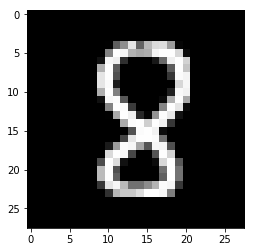

In [15]:
images, labels = next(iter(trainloader))

img = images[1].view(1,784)

with torch.no_grad(): #Turn gradient tracking off while prediction
    log_ps = model(img)
    ps = torch.exp(log_ps)

print('Label: ',labels[1])
print('Prediction: ', ps.argmax())
plt.imshow(images[1].view(28,28), cmap='Greys_r')

So the steps to train a NN:
 * Load in data
 * Define model architecture
 * Set up loss function and optimizer
 * Run forward pass, calculate loss, update weight, repeat (training loop)
 * Check predictions